# Bank Churn EDA Project

## Setup

In [1]:
import pandas as pd
import numpy as np

In [2]:
file_path_1="Bank_Churn.csv"
file_path_2="Bank_Churn_Messy.xlsx"
df1=pd.read_csv(file_path_1)
df2=pd.read_excel(file_path_2,sheet_name=0)
df3=pd.read_excel(file_path_2,sheet_name=1)

## Data Introduction

In [9]:
df1.head()
df1.info()
#df1.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


- CSV file is merged sheets from Excel
- some of CSV columns have been converted to binary in prep for data modeling and euro symbol has been stripped from currency amounts

In [12]:
df2.head()
df2.info()
df2.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10001 non-null  int64  
 1   Surname          9998 non-null   object 
 2   CreditScore      10001 non-null  int64  
 3   Geography        10001 non-null  object 
 4   Gender           10001 non-null  object 
 5   Age              9998 non-null   float64
 6   Tenure           10001 non-null  int64  
 7   EstimatedSalary  10001 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 625.2+ KB


CustomerId  Surname     CreditScore  Geography  Gender  Age   Tenure  EstimatedSalary
15628319    Walker      792          French     Female  28.0  4       €38190.78          2
15732113    Butters     671          Spain      Male    50.0  8       €2560.11           1
15732175    Bruno       776          French     Male    37.0  2       €8065.0            1
15732199    Gether      837          Spain      Male    31.0  9       €50972.6           1
15732202    Abramovich  615          French     Male    34.0  1       €73124.53          1
                                                                                        ..
15649379    Somayina    850          France     Female  46.0  3       €187980.21         1
15649414    Walker      570          France     Female  61.0  6       €45214.04          1
15649418    Krylov      776          French     Female  29.0  7       €115818.51         1
15649423    Cooper      580          French     Female  35.0  8       €10357.03          1
1564

In [10]:
df3.head()
#df3.info()
#df3.value_counts()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0


It looks like there may be two duplicates in df3 and one in df2. There may also be a few nulls in df2.

## Data Cleaning

### Data Types

In [4]:
#Convert all the monetary columns from object to float by stripping off the currency symbol
df3.Balance=df3.Balance.str.lstrip('€').astype(float)
df2.EstimatedSalary=df2.EstimatedSalary.str.lstrip('€')
df2.EstimatedSalary=df2.EstimatedSalary.str.lstrip('-€').astype(float)

AttributeError: Can only use .str accessor with string values!

In [22]:
#Age should be int
df2.Age.astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

This can't be done until the NaN are taken care of. Per the guided project's instructions, any numeric null should be replaced with the median. I shall do that in the next section and take care of the data type assignment at the same time.

### Null Handling

In [15]:
df2.isnull().sum()

CustomerId         0
Surname            3
CreditScore        0
Geography          0
Gender             0
Age                3
Tenure             0
EstimatedSalary    0
dtype: int64

In [20]:
df2.loc[(df2.Surname.isnull()==True) | (df2.Age.isnull()==True)]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
28,15728693,NaN,574,Germany,Female,NaN,3,-€999999
121,15580203,NaN,674,Spain,Male,NaN,6,-€999999
9389,15756954,NaN,538,France,Female,NaN,2,-€999999


Same three entries and they also have a weird salary. Maybe df3 can shed some light on the missing stuff. I know I could merge the dfs, but I don't want to right now.

In [24]:
df3.loc[(df3.CustomerId==15728693)|(df3.CustomerId==15580203)|(df3.CustomerId==15756954)]

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
29,15728693,€141349.43,1,Yes,3,Yes,0
122,15580203,€120193.42,1,No,6,No,0
9390,15756954,€0.0,1,Yes,2,Yes,0


Nope, not really helpful. Also, upon review of the guidance of this guided project, it appears that the tables should be joined prior to doing anything else.

### Preparation - Joining

In [5]:
bank_info=df2.merge(df3,how='left', on='CustomerId')

### Duplicates

In [24]:
bank_info.duplicated(keep=False)
#bank_info.head()
#bank_info.tail()

0         True
1         True
2        False
3        False
4        False
         ...  
9999     False
10000     True
10001     True
10002     True
10003     True
Length: 10004, dtype: bool

In [6]:
bank_info=bank_info.drop_duplicates()

In [7]:
bank_info=bank_info.drop('Tenure_x',axis=1)
bank_info=bank_info.rename(columns={'Tenure_y':'Tenure'})
bank_info.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,101348.88,0.00,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,112542.58,83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42.0,113931.57,159660.80,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,93826.63,0.00,2,No,1,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,79084.10,125510.82,1,Yes,2,Yes,0


### Null Handling - Take 2

In [27]:
#Per instructions, categorical NaN = 'Missing' and numeric NaN = MEDIAN
bank_info.Age.median()

37.0

In [8]:
bank_info.Age=bank_info.Age.fillna(37).astype(int)
bank_info.Surname=bank_info.Surname.fillna('Missing').astype('string')

In [52]:
#check the data
bank_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  string 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   EstimatedSalary  10000 non-null  float64
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  object 
 10  Tenure           10000 non-null  int64  
 11  IsActiveMember   10000 non-null  object 
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(6), object(4), string(1)
memory usage: 1.1+ MB


### Data Consistency

In [32]:
#There is inconsistent data in the Geography column
bank_info.Geography.value_counts()

Geography
Germany    2509
Spain      2477
France     1741
French     1658
FRA        1619
Name: count, dtype: int64

In [9]:
#Make all entries for France consistent
bank_info.Geography=np.where((bank_info.Geography == 'French') | (bank_info.Geography == 'FRA'),'France',bank_info.Geography)
bank_info.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [38]:
#Check the Gender column and 'yes/no's
bank_info.Gender.value_counts()
bank_info.HasCrCard.value_counts()
bank_info.IsActiveMember.value_counts()
#all clear

IsActiveMember
Yes    5152
No     4852
Name: count, dtype: int64

In [10]:
bank_info[['Geography','Gender']]=bank_info[['Geography','Gender']].astype('string')
bank_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  string 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  string 
 4   Gender           10000 non-null  string 
 5   Age              10000 non-null  int64  
 6   EstimatedSalary  10000 non-null  float64
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  object 
 10  Tenure           10000 non-null  int64  
 11  IsActiveMember   10000 non-null  object 
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(6), object(2), string(3)
memory usage: 1.1+ MB


I'm not making the `HasCrCard` or `IsActiveMember` fields strings because I plan to make those binary.

In [55]:
bank_info.describe()
#min and max salaries look wonky...max age and max balance are odd but not unreasonable-->box plot to see if they are lone outliers

,CustomerId,CreditScore,Age,EstimatedSalary,Balance,NumOfProducts,Tenure,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921500,100362.194689,76485.889288,1.530200,5.012800,0.203700
std,7.193619e+04,96.653299,10.487552,59584.545007,62397.405202,0.581654,2.892174,0.402769
min,1.556570e+07,350.000000,18.000000,11.580000,0.000000,1.000000,0.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,51002.110000,0.000000,1.000000,3.000000,0.000000
50%,1.569074e+07,652.000000,37.000000,100272.165000,97198.540000,1.000000,5.000000,0.000000
75%,1.575323e+07,718.000000,44.000000,149406.545000,127644.240000,2.000000,7.000000,0.000000
max,1.581569e+07,850.000000,92.000000,999999.000000,250898.090000,4.000000,10.000000,1.000000


In [11]:
#impute median salary for min and max per instructions
bank_info.EstimatedSalary=np.where((bank_info.EstimatedSalary == 11.58) | (bank_info.EstimatedSalary==999999.00),100272.17,bank_info.EstimatedSalary)
bank_info.describe()

,CustomerId,CreditScore,Age,EstimatedSalary,Balance,NumOfProducts,Tenure,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921500,100102.302699,76485.889288,1.530200,5.012800,0.203700
std,7.193619e+04,96.653299,10.487552,57501.435928,62397.405202,0.581654,2.892174,0.402769
min,1.556570e+07,350.000000,18.000000,90.070000,0.000000,1.000000,0.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,51014.837500,0.000000,1.000000,3.000000,0.000000
50%,1.569074e+07,652.000000,37.000000,100272.170000,97198.540000,1.000000,5.000000,0.000000
75%,1.575323e+07,718.000000,44.000000,149388.247500,127644.240000,2.000000,7.000000,0.000000
max,1.581569e+07,850.000000,92.000000,199992.480000,250898.090000,4.000000,10.000000,1.000000


In [ ]:
import seaborn as sns
sns.boxplot(bank_info,x='Balance')

<Axes: >

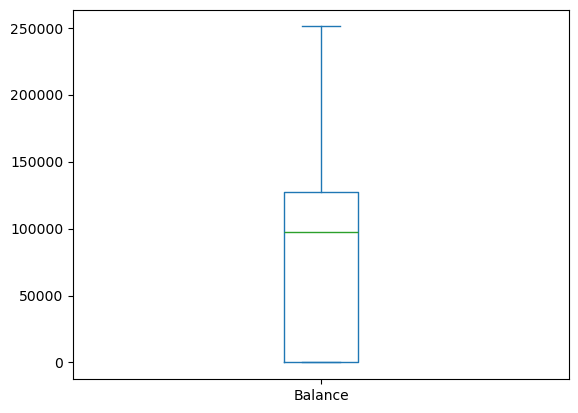

In [59]:
 import matplotlib.pyplot as plt
bank_info['Balance'].plot.box()

<Axes: >

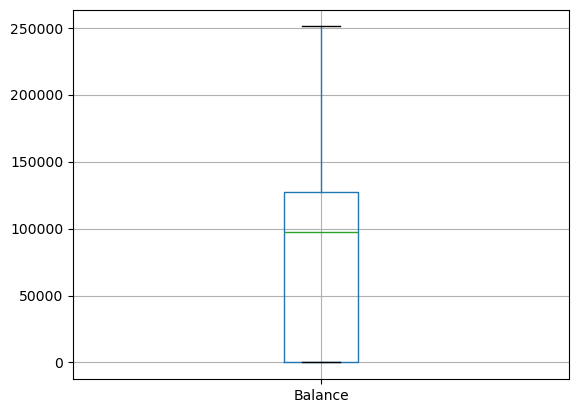

In [63]:
bank_info.boxplot('Balance')

In [81]:
bank_info.loc[bank_info.Balance==250898.09]
bank_info.loc[2093,'Balance']=97198.54
bank_info.loc[2093]

CustomerId         15757408
Surname                  Lo
CreditScore             655
Geography             Spain
Gender                 Male
Age                      38
EstimatedSalary     81054.0
Balance            97198.54
NumOfProducts             3
HasCrCard               Yes
Tenure                    3
IsActiveMember          Yes
Exited                    1
Name: 2093, dtype: object

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


array([[<Axes: title={'center': 'Balance'}>]], dtype=object)

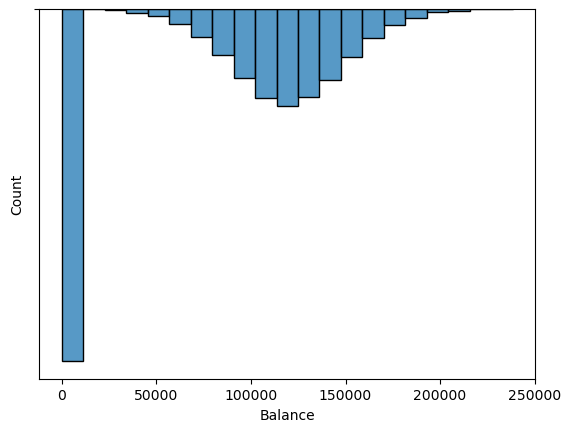

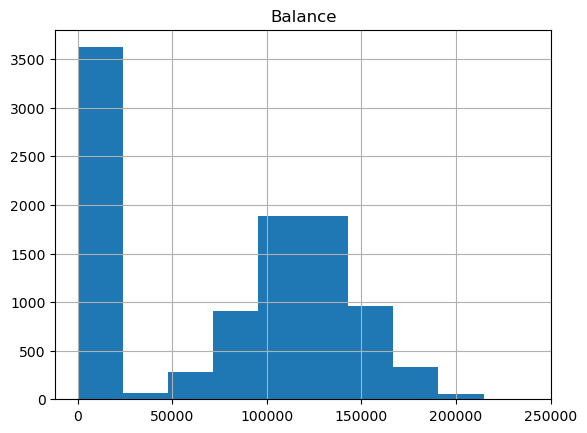

In [100]:
sns.boxplot(bank_info,x='Balance')
bank_info.describe()
sns.histplot(bank_info.Balance)
bank_info.hist('Balance')

In [107]:
low_bal_outliers=(bank_info.Balance>10000).sum()
low_bal_outliers
high_bal_outliers=(bank_info.Balance>200000).sum()
high_bal_outliers
bank_info.loc[bank_info.Balance>200000].sort_values(by='Balance',ascending = False)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
3281,15715622,To Rot,583,France,Female,57,147964.99,238387.56,1,Yes,3,Yes,1
8734,15714241,Haddon,749,Spain,Male,42,101108.85,222267.63,1,No,9,No,1
3589,15571958,McIntosh,489,Spain,Male,40,171867.08,221532.80,1,No,3,No,0
6718,15586674,Shaw,663,Spain,Female,58,74176.71,216109.88,1,Yes,5,Yes,1
1068,15599131,Dilke,650,Germany,Male,26,128815.33,214346.96,2,No,4,No,0
139,15594408,Chia,584,Spain,Female,48,75161.25,213146.20,1,No,2,No,1
1534,15769818,Moore,850,France,Female,37,69372.88,212778.20,1,Yes,3,Yes,0
3921,15620268,Thomson,634,Germany,Male,43,115268.86,212696.32,1,No,3,No,0
2710,15780212,Mao,592,France,Male,37,176395.02,212692.97,1,No,4,No,0
8703,15690589,Udinesi,541,France,Male,37,148814.54,212314.03,1,Yes,9,Yes,0


The distribution is normal except for that huge spike below 10,000. 🤔 The high end looks fine...and I am going to stand by my current changes.

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='EstimatedSalary', ylabel='Count'>

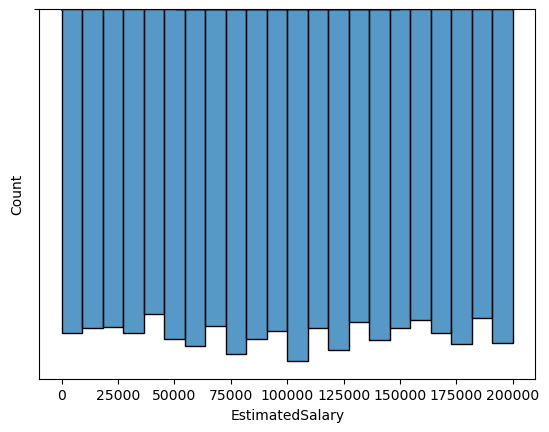

In [110]:
sns.boxplot(bank_info,x='EstimatedSalary')
sns.histplot(bank_info.EstimatedSalary)

While the lower salaries seem odd, the distribution is uniform and I'd feel weird moving so many to the median.

In [111]:
sal_outliers=(bank_info.EstimatedSalary<25000).sum()
sal_outliers

1216

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

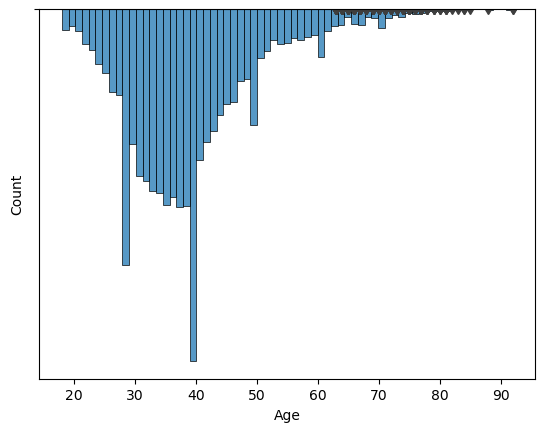

In [94]:
sns.boxplot(bank_info,x='Age')
sns.histplot(bank_info.Age)

I'm leaving age alone because there do seem to be a number of older people and the 92-year-old is not all that strange.

## Graphs and Charts

### Explore the Target

[Text(0, 0, 'Non-Churner'), Text(1, 0, 'Churner')]

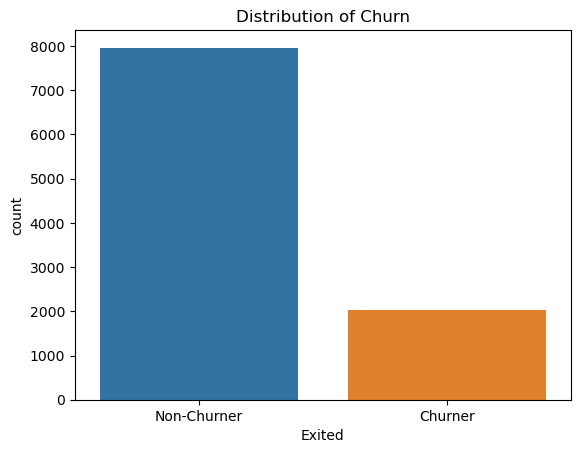

In [15]:
#Build a bar chart showing the counts of churners v non-churners
import seaborn as sns
import matplotlib.pyplot as plt

churn=sns.countplot(x='Exited',data=bank_info)
plt.title('Distribution of Churn')
churn.set_xticklabels(['Non-Churner','Churner'])

More people stay than exit, but ~2000 out of 10,000 member is 20%, which is not pretty or good for business.

### Explore the Variables

#### Bar Plots

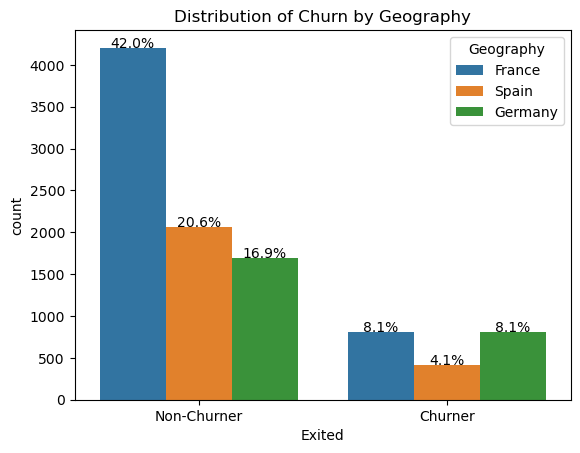

In [136]:
#Look at the percentage of churners by Geography and Gender

churn_geo=sns.countplot(x='Exited',data=bank_info,hue='Geography')
plt.title('Distribution of Churn by Geography')
churn_geo.set_xticklabels(['Non-Churner','Churner'])
# If you specifically need percentages, you can calculate them manually
# For example:
total = len(bank_info)
for p in churn_geo.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    churn_geo.annotate(percentage, (x, y), ha='center')

A heavy percentage of the bank's customers are French so the non-churner demographic isn't surprising. It appears that French and German customers are equally as likely to exit.

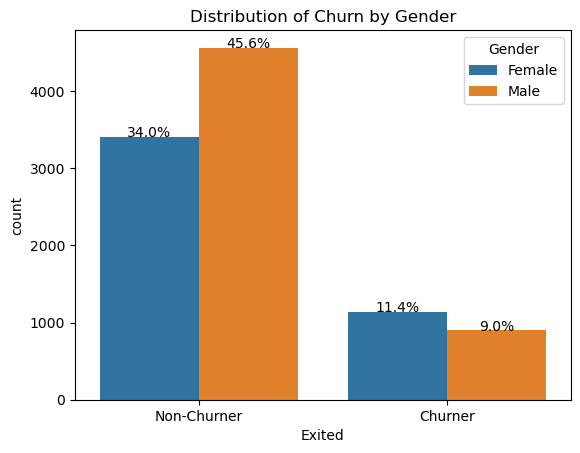

In [138]:
#Look at the percentage of churners by Geography and Gender

churn_gen=sns.countplot(x='Exited',data=bank_info,hue='Gender')
plt.title('Distribution of Churn by Gender')
churn_gen.set_xticklabels(['Non-Churner','Churner'])
# If you specifically need percentages, you can calculate them manually
# For example:
total = len(bank_info)
for p in churn_gen.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    churn_gen.annotate(percentage, (x, y), ha='center')

LOL it's always the men!

#### Box Plots

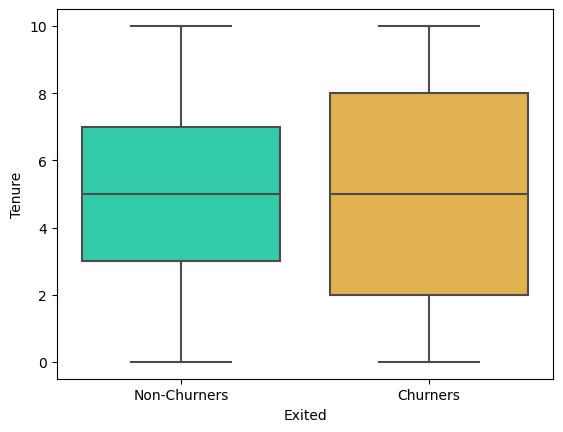

In [177]:
#Build box plots for each numeric field broken out by churners v non-churners
#sns.pairplot(bank_info)
#age=sns.boxplot(x=bank_info.Exited,y=bank_info.Age).set_xticklabels(['Non-Churners',"Churners"])
#bal=sns.boxplot(x=bank_info.Exited,y=bank_info.Balance).set_xticklabels(['Non-Churners',"Churners"])
#sal=sns.boxplot(x=bank_info.Exited,y=bank_info.EstimatedSalary).set_xticklabels(['Non-Churners',"Churners"])
#score=sns.boxplot(x=bank_info.Exited,y=bank_info.CreditScore).set_xticklabels(['Non-Churners',"Churners"])
#numprod=sns.boxplot(x=bank_info.Exited,y=bank_info.NumOfProducts).set_xticklabels(['Non-Churners',"Churners"])
tnr=sns.boxplot(x=bank_info.Exited,y=bank_info.Tenure).set_xticklabels(['Non-Churners',"Churners"])


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


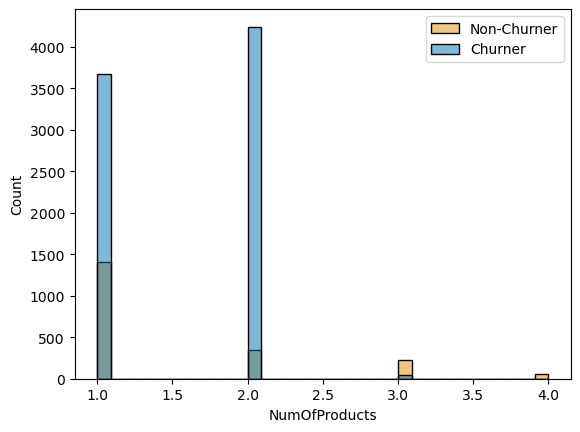

In [16]:
#Build histograms for each numeric field broken out by churners v non-churners
#sns.pairplot(bank_info)
#ageh=sns.histplot(x=bank_info.Age, hue=bank_info.Exited,palette='colorblind').legend(labels=['Non-Churner','Churner'])
#balh=sns.histplot(x=bank_info.Balance,hue=bank_info.Exited,palette='colorblind').legend(labels=['Non-Churner','Churner'])
#salh=sns.histplot(x=bank_info.EstimatedSalary,hue=bank_info.Exited,palette='colorblind').legend(labels=['Non-Churner','Churner'])
#scoreh=sns.histplot(x=bank_info.CreditScore,hue=bank_info.Exited,palette='colorblind').legend(labels=['Non-Churner','Churner'])
numprodh=sns.histplot(x=bank_info.NumOfProducts,hue=bank_info.Exited,palette='colorblind').legend(labels=['Non-Churner','Churner'])
#tnrh=sns.histplot(x=bank_info.Tenure,hue=bank_info.Exited,palette='colorblind').legend(labels=['Non-Churner','Churner'])

## Prep for Modeling

### Drop Columns Useless for Modeling

In [12]:
# Surname doesn't affect the target, nor does ID number
bank_info_prepped=bank_info.drop({'Surname','CustomerId'},axis=1)

In [13]:
bank_info_prepped.head()

,CreditScore,Geography,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,619,France,Female,42,101348.88,0.00,1,Yes,2,Yes,1
2,608,Spain,Female,41,112542.58,83807.86,1,Yes,1,Yes,0
3,502,France,Female,42,113931.57,159660.80,3,No,8,No,1
4,699,France,Female,39,93826.63,0.00,2,No,1,No,0
5,850,Spain,Female,43,79084.10,125510.82,1,Yes,2,Yes,0


### Dummy Variables

In [38]:
#Categorical columns: Geography, Gender, HasCrCard, IsActiveMember
#bank_info_prepped=pd.get_dummies(bank_info,columns=['Geography'])
bank_info_prepped=pd.get_dummies(bank_info,columns=['Geography','Gender','HasCrCard','IsActiveMember'],drop_first=True)
bank_info_prepped.head()

,CreditScore,Age,EstimatedSalary,Balance,NumOfProducts,Tenure,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes
0,619,42,101348.88,0.00,1,2,1,False,False,False,True,True
2,608,41,112542.58,83807.86,1,1,0,False,True,False,True,True
3,502,42,113931.57,159660.80,3,8,1,False,False,False,False,False
4,699,39,93826.63,0.00,2,1,0,False,False,False,False,False
5,850,43,79084.10,125510.82,1,2,0,False,True,False,True,True


### Feature Engineering

In [39]:
#Create a new column for balance_v_income feature

In [42]:
bank_info_prepped['Bal_v_Sal']=round(bank_info_prepped.Balance/bank_info_prepped.EstimatedSalary,2)
bank_info_prepped.head()

,CreditScore,Age,EstimatedSalary,Balance,NumOfProducts,Tenure,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes,Bal_v_Sal
0,619,42,101348.88,0.00,1,2,1,False,False,False,True,True,0.00
2,608,41,112542.58,83807.86,1,1,0,False,True,False,True,True,0.74
3,502,42,113931.57,159660.80,3,8,1,False,False,False,False,False,1.40
4,699,39,93826.63,0.00,2,1,0,False,False,False,False,False,0.00
5,850,43,79084.10,125510.82,1,2,0,False,True,False,True,True,1.59


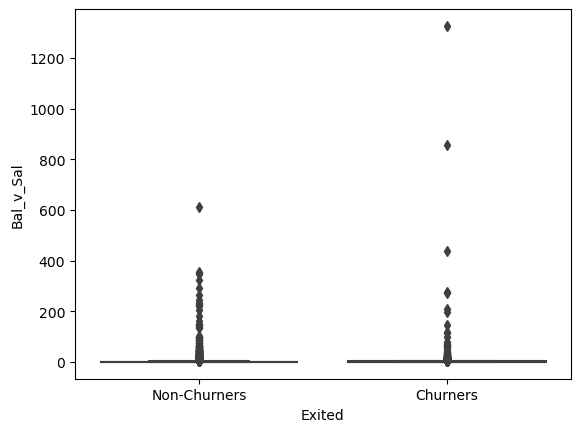

In [45]:
#bvsh=sns.histplot(x=bank_info_prepped.Bal_v_Sal,hue=bank_info_prepped.Exited,palette='colorblind').legend(labels=['Non-Churner','Churner'])
bvs=sns.boxplot(x=bank_info_prepped.Exited,y=bank_info_prepped.Bal_v_Sal).set_xticklabels(['Non-Churners',"Churners"])

Wow, there are a lot of outliers in the churners.

In [46]:
bank_info_prepped.Bal_v_Sal.describe()

count    10000.000000
mean         2.817368
std         21.813989
min          0.000000
25%          0.000000
50%          0.750000
75%          1.510000
max       1326.100000
Name: Bal_v_Sal, dtype: float64

In [49]:
bank_info_prepped.loc[bank_info_prepped.Bal_v_Sal>600]

,CreditScore,Age,EstimatedSalary,Balance,NumOfProducts,Tenure,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes,Bal_v_Sal
7566,708,52,123.07,105355.81,1,10,1,False,False,True,False,False,856.06
8723,621,35,143.34,87619.29,1,7,0,False,False,True,False,False,611.27
9011,645,59,91.75,121669.93,2,8,1,True,False,False,False,False,1326.10


## Exporting

In [52]:
bank_info_prepped.to_csv('prepped_bank_churn.csv',index=False)